In [ ]:
!pip install pandas pydotplus IPython scikit-learn

In [1]:
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import tree

In [2]:
golf_df = pd.read_csv('datasets/1-golf.csv')
one_hot_data = pd.get_dummies(golf_df[['Outlook', 'Temperature', 'Humidity', 'Windy']])
golf_df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


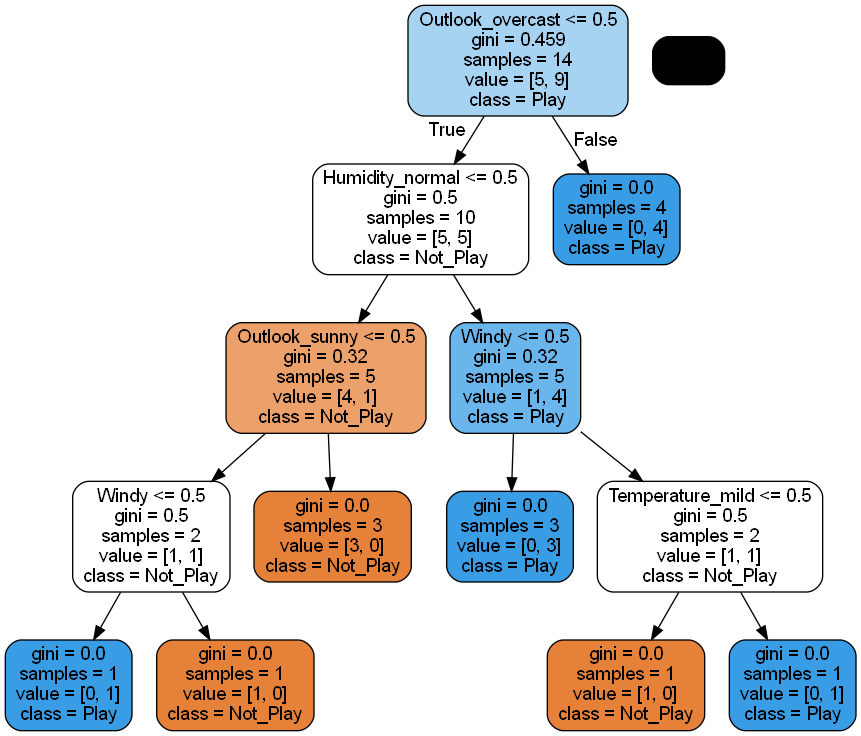

In [3]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, golf_df['Play'])

dot_data = tree.export_graphviz(clf_train, out_file=None,
                                feature_names=list(one_hot_data.columns.values),
                                class_names=['Not_Play', 'Play'],
                                rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())